In [ ]:
# Guanxiao Chen
# 1005717841
# INF2178
# Assignment 1

In [21]:
import pandas as pd

# Data Cleaning
# Read the dataset
df = pd.read_excel('./INF2178_A1_data.xlsx')

# Display DataFrame's information
print('Data Overview:')
print(df.info())

# Drop unuseful columns
columns_to_drop = ['ORGANIZATION_NAME', 'PROGRAM_ID', 'PROGRAM_NAME']
df_cleaned = df.drop(columns=columns_to_drop)

# Check missing values
print('Missing Values:')
print(df_cleaned.isnull().sum())

# Fill missing values with mode
df_cleaned['PROGRAM_MODEL'].fillna(df_cleaned['PROGRAM_MODEL'].mode()[0], inplace=True)
df_cleaned['OVERNIGHT_SERVICE_TYPE'].fillna(df_cleaned['OVERNIGHT_SERVICE_TYPE'].mode()[0], inplace=True)
df_cleaned['PROGRAM_AREA'].fillna(df_cleaned['PROGRAM_AREA'].mode()[0], inplace=True)

# List all numerical columns to fill missing values
numerical_columns_to_fill = ['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']

# Fill missing values in numerical columns with  mean
for column in numerical_columns_to_fill:
    mean_value = df_cleaned[column].mean()
    df_cleaned[column].fillna(mean_value, inplace=True)

# Dispaly the cleaned DataFrame
print('\n Cleaned Data Overview:')
print(df_cleaned.info())

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50944 entries, 0 to 50943
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   OCCUPANCY_DATE          50944 non-null  datetime64[ns]
 1   ORGANIZATION_NAME       50944 non-null  object        
 2   PROGRAM_ID              50944 non-null  int64         
 3   PROGRAM_NAME            50909 non-null  object        
 4   SECTOR                  50944 non-null  object        
 5   PROGRAM_MODEL           50942 non-null  object        
 6   OVERNIGHT_SERVICE_TYPE  50942 non-null  object        
 7   PROGRAM_AREA            50942 non-null  object        
 8   SERVICE_USER_COUNT      50944 non-null  int64         
 9   CAPACITY_TYPE           50944 non-null  object        
 10  CAPACITY_ACTUAL_BED     32399 non-null  float64       
 11  OCCUPIED_BEDS           32399 non-null  float64       
 12  CAPACITY_ACTUAL_ROOM    18545 n


T-Test for OVERNIGHT_SERVICE_TYPE = Motel/Hotel Shelter and OCCUPIED_BEDS:
T-Statistic (Bed): 7.477804548900065
P-Value (Bed): 7.678401480403341e-14

T-Test for OVERNIGHT_SERVICE_TYPE = Motel/Hotel Shelter and OCCUPIED_ROOMS:
T-Statistic (Room): 39.233781102856824
P-Value (Room): 0.0


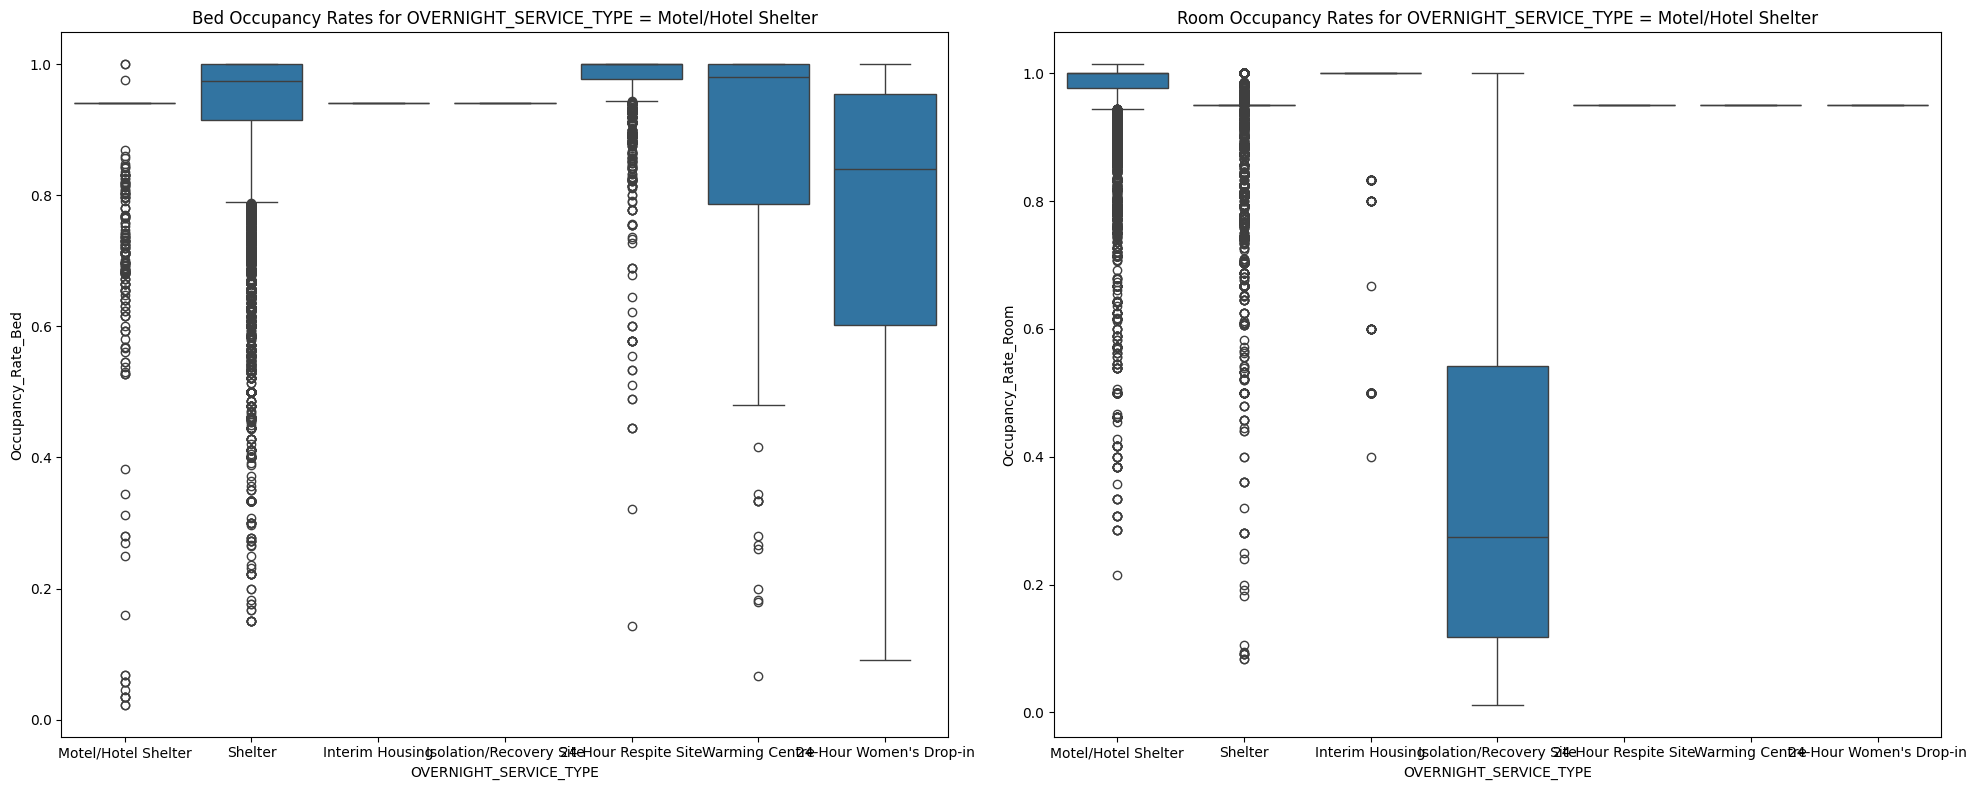


T-Test for OVERNIGHT_SERVICE_TYPE = Shelter and OCCUPIED_BEDS:
T-Statistic (Bed): -12.199726242365761
P-Value (Bed): 3.481175171392391e-34

T-Test for OVERNIGHT_SERVICE_TYPE = Shelter and OCCUPIED_ROOMS:
T-Statistic (Room): 5.42008220271293
P-Value (Room): 5.984139751005709e-08


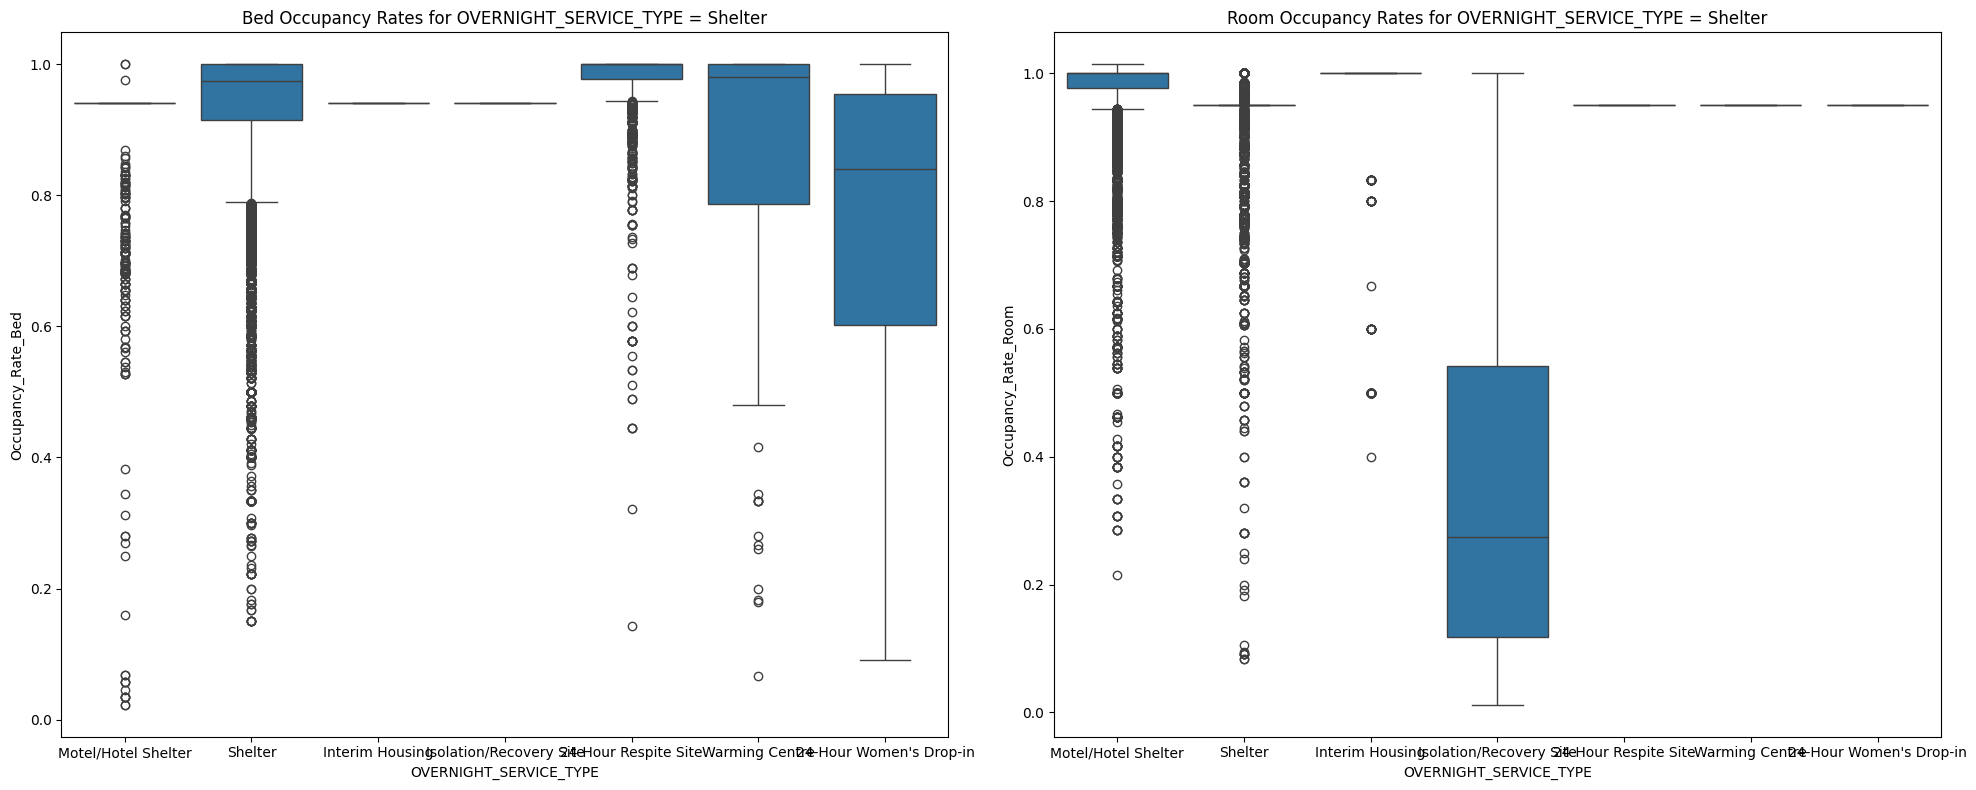

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



T-Test for OVERNIGHT_SERVICE_TYPE = Interim Housing and OCCUPIED_BEDS:
T-Statistic (Bed): 2.407218558916227
P-Value (Bed): 0.0160780801490479

T-Test for OVERNIGHT_SERVICE_TYPE = Interim Housing and OCCUPIED_ROOMS:
T-Statistic (Room): 1.1079810333294913
P-Value (Room): 0.2678752383766573


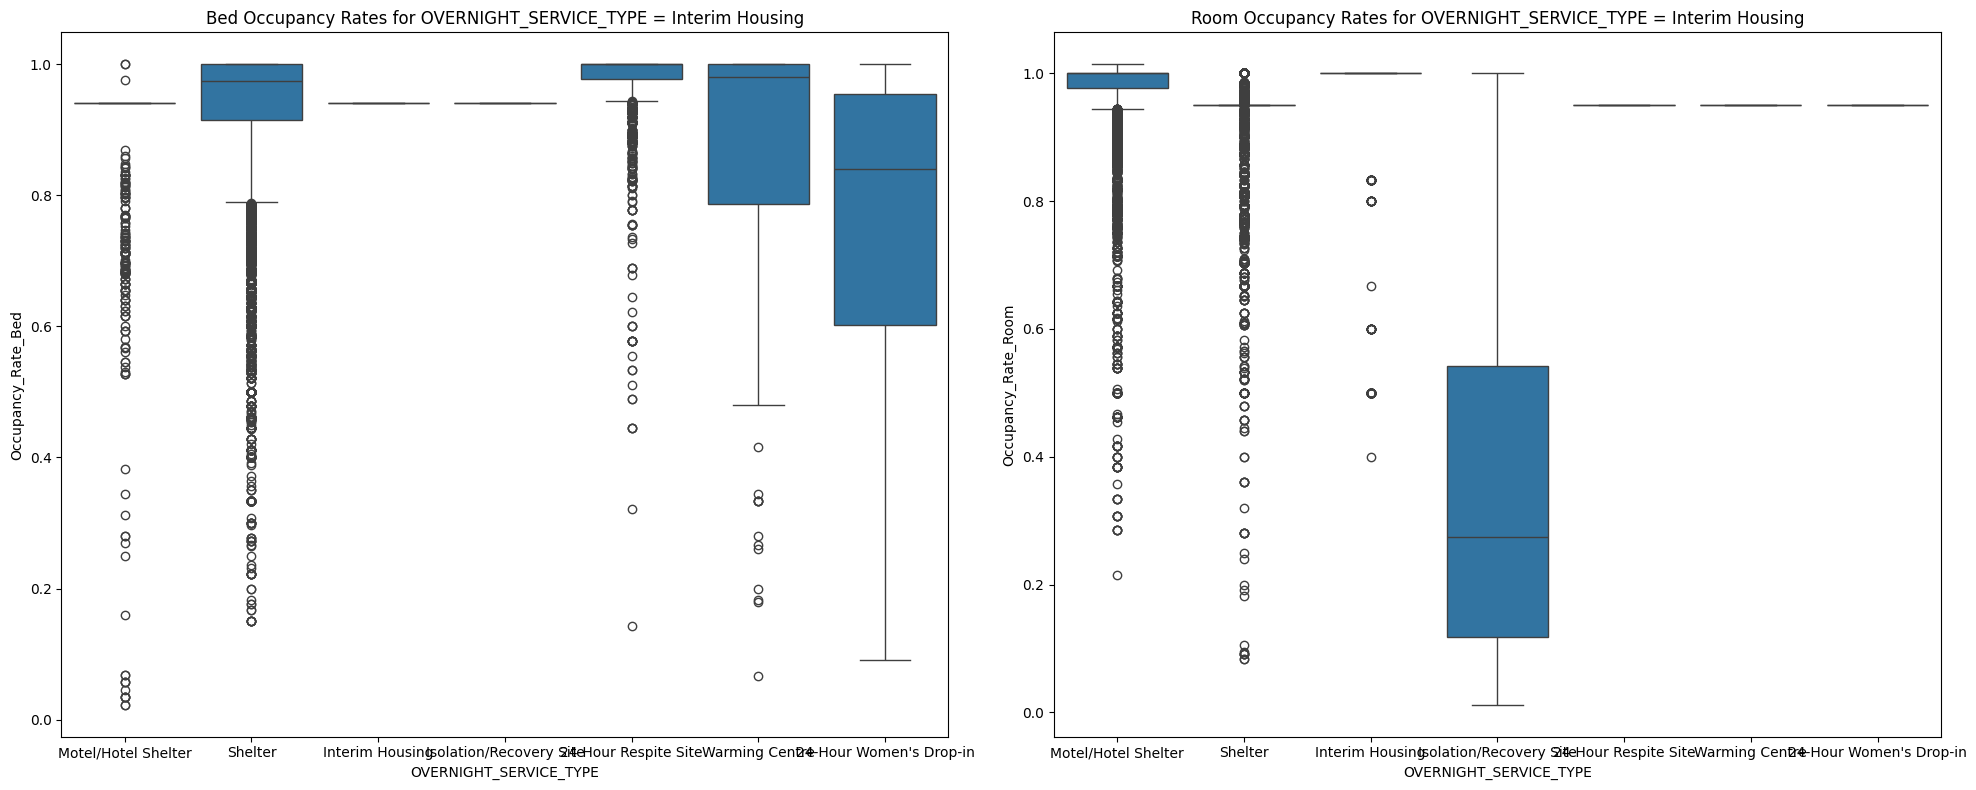

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



T-Test for OVERNIGHT_SERVICE_TYPE = Isolation/Recovery Site and OCCUPIED_BEDS:
T-Statistic (Bed): 2.503756018286767
P-Value (Bed): 0.012291375905078724

T-Test for OVERNIGHT_SERVICE_TYPE = Isolation/Recovery Site and OCCUPIED_ROOMS:
T-Statistic (Room): -266.3224065320719
P-Value (Room): 0.0


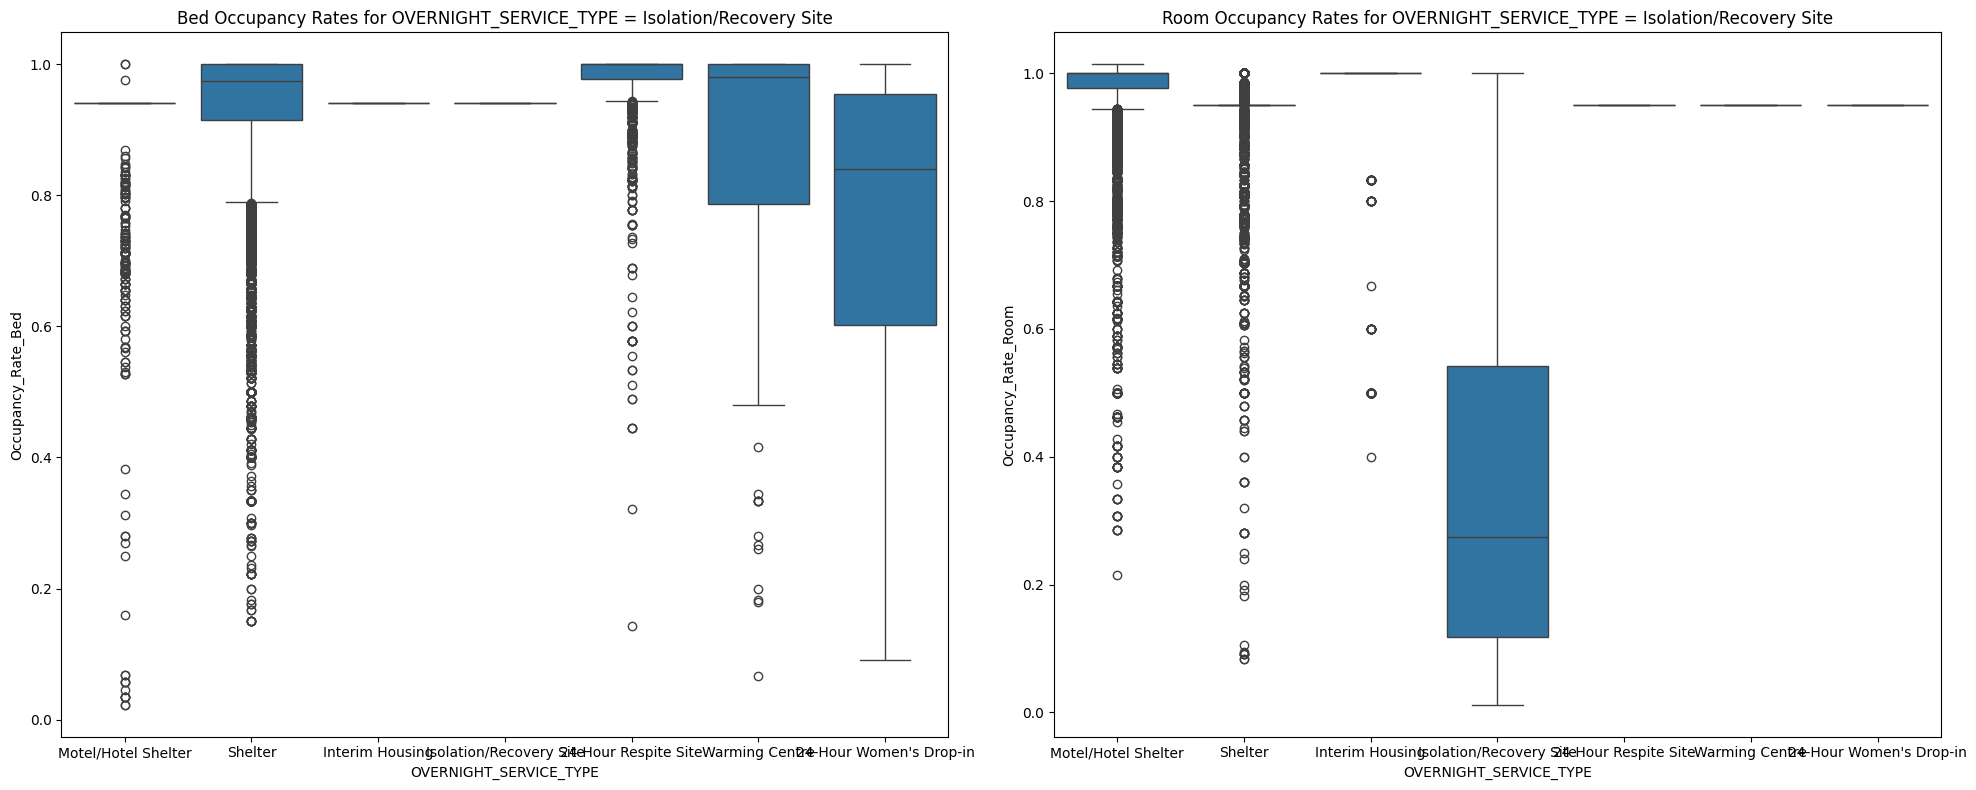

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



T-Test for OVERNIGHT_SERVICE_TYPE = 24-Hour Respite Site and OCCUPIED_BEDS:
T-Statistic (Bed): 27.00103870667847
P-Value (Bed): 1.9172612386235708e-159

T-Test for OVERNIGHT_SERVICE_TYPE = 24-Hour Respite Site and OCCUPIED_ROOMS:
T-Statistic (Room): 3.4091670240769334
P-Value (Room): 0.0006521202827085875


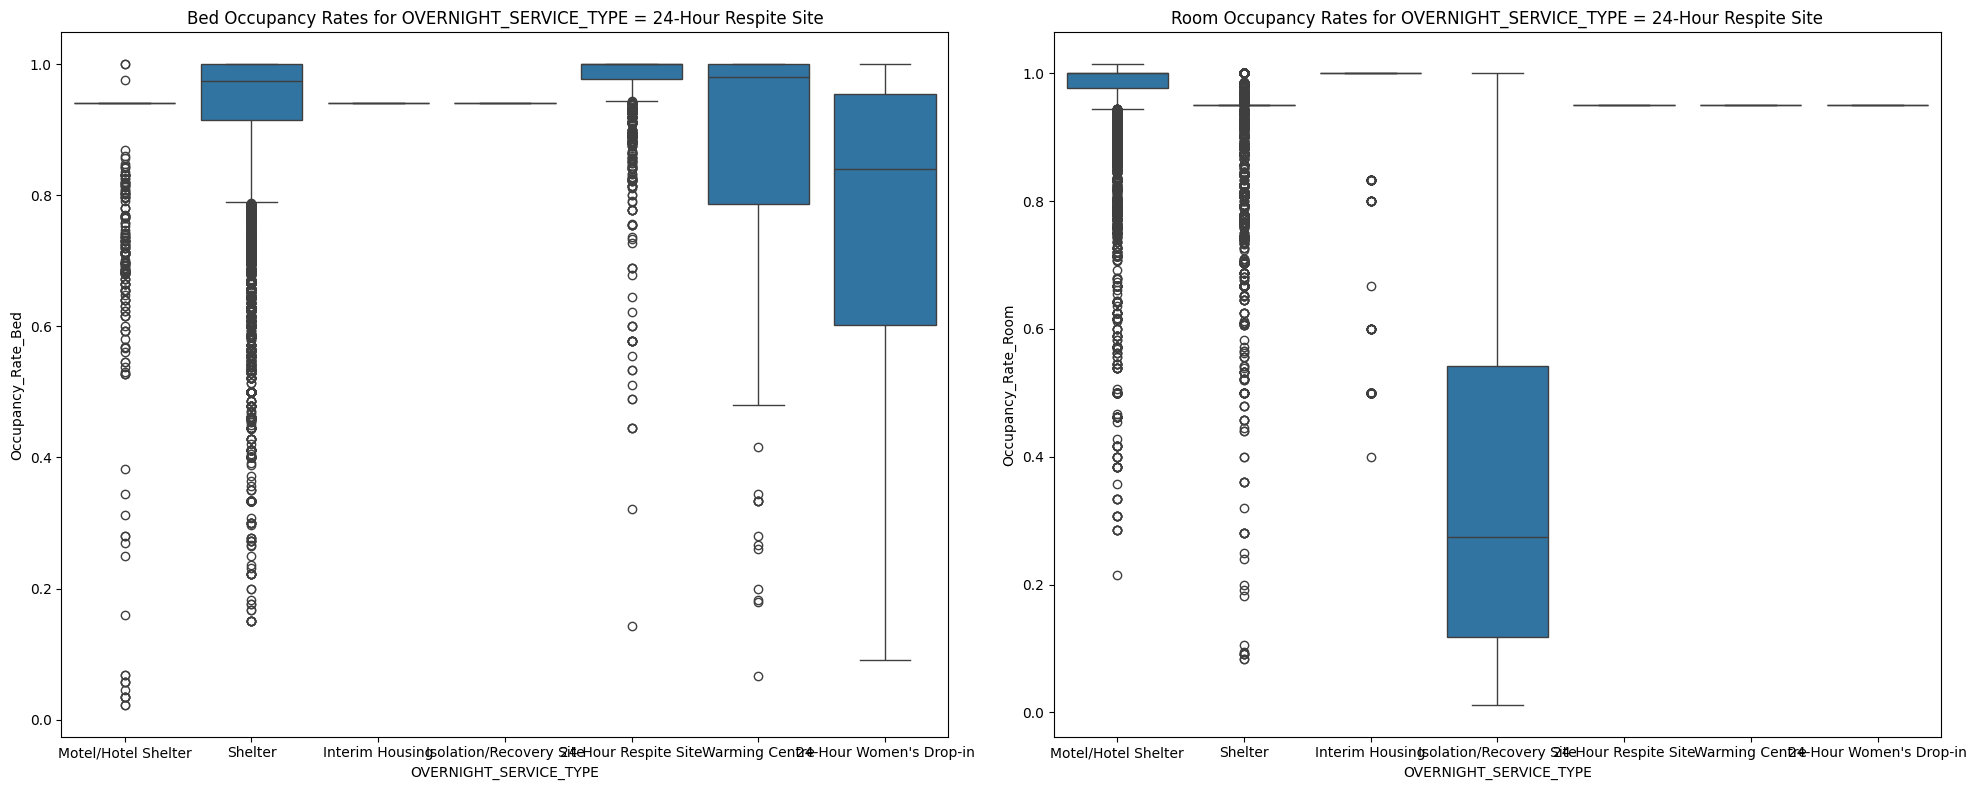

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



T-Test for OVERNIGHT_SERVICE_TYPE = Warming Centre and OCCUPIED_BEDS:
T-Statistic (Bed): -10.398248656315669
P-Value (Bed): 2.6770465647054093e-25

T-Test for OVERNIGHT_SERVICE_TYPE = Warming Centre and OCCUPIED_ROOMS:
T-Statistic (Room): 0.8275835329821488
P-Value (Room): 0.4079102738550978


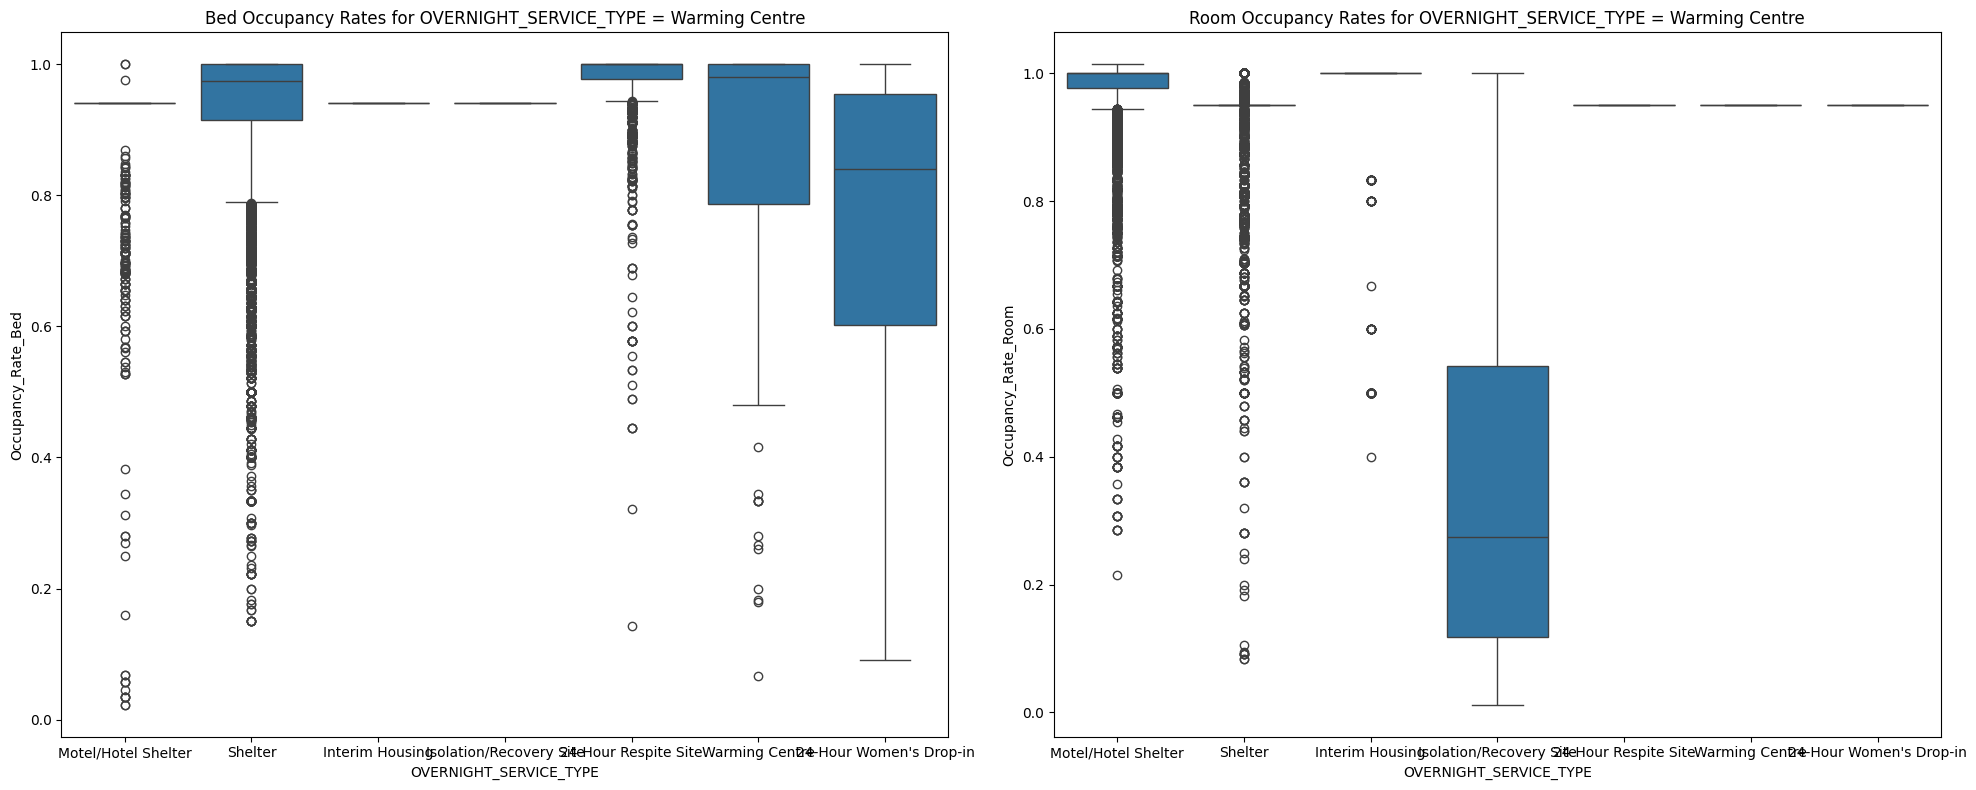

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



T-Test for OVERNIGHT_SERVICE_TYPE = 24-Hour Women's Drop-in and OCCUPIED_BEDS:
T-Statistic (Bed): -37.581726068219886
P-Value (Bed): 6.478606061638345e-305

T-Test for OVERNIGHT_SERVICE_TYPE = 24-Hour Women's Drop-in and OCCUPIED_ROOMS:
T-Statistic (Room): 1.3778680169827764
P-Value (Room): 0.1682500935971402


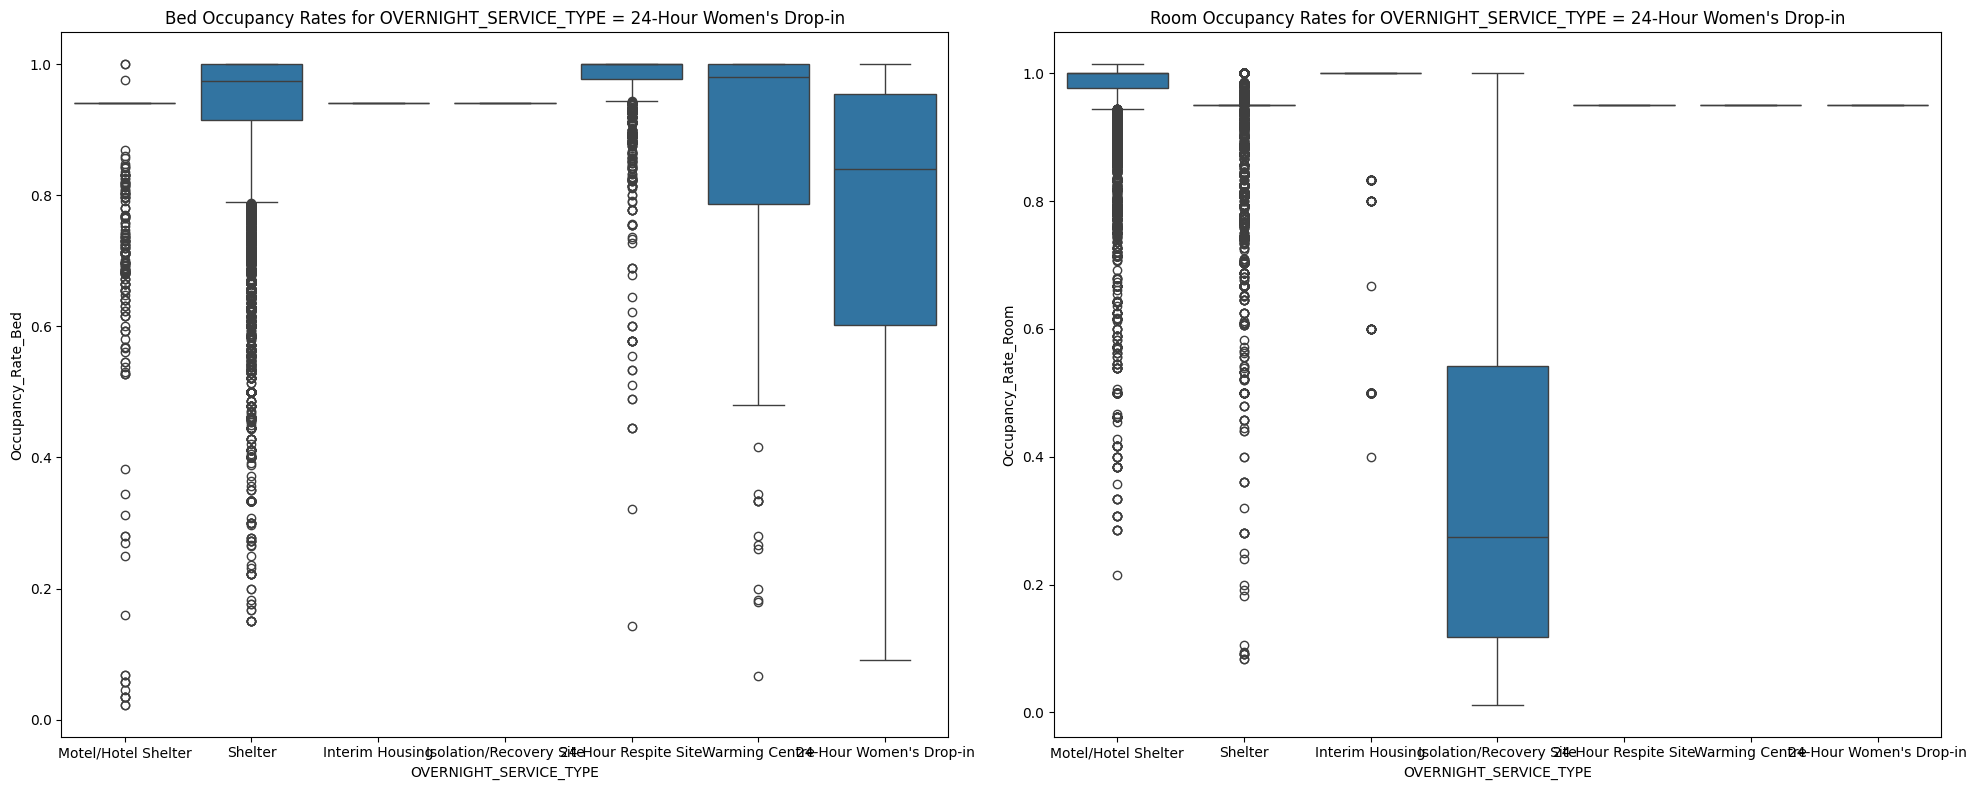

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# t-test 1 (overnight service type)

# Read dataset
df = pd.read_excel('./INF2178_A1_data.xlsx')

# Choose variables
categorical_variable = 'OVERNIGHT_SERVICE_TYPE'
continuous_variable_bed = 'OCCUPIED_BEDS'
continuous_variable_room = 'OCCUPIED_ROOMS'

# Calculate shelter program occupancy rates
df_cleaned['Occupancy_Rate_Bed'] = df_cleaned['OCCUPIED_BEDS']/df_cleaned['CAPACITY_ACTUAL_BED']
df_cleaned['Occupancy_Rate_Room'] = df_cleaned['OCCUPIED_ROOMS']/df_cleaned['CAPACITY_ACTUAL_ROOM']

# Identify unique categories
categories = df_cleaned[categorical_variable].unique()

# Perform t-tests and plot boxplots
for category in categories:
    # Select data
    category_data_bed = df_cleaned[df_cleaned[categorical_variable] == category]['Occupancy_Rate_Bed']
    category_data_room = df_cleaned[df_cleaned[categorical_variable] == category]['Occupancy_Rate_Room']

    # Perform an independent t-test for bed occupancy rates
    t_statistic_bed, p_value_bed = ttest_ind(category_data_bed, df_cleaned[df_cleaned[categorical_variable] != category]['Occupancy_Rate_Bed'])

    # Perform an independent t-test for room occupancy rates
    t_statistic_room, p_value_room = ttest_ind(category_data_room, df_cleaned[df_cleaned[categorical_variable] != category]['Occupancy_Rate_Room'])

    # Print results
    print(f'\nT-Test for {categorical_variable} = {category} and {continuous_variable_bed}:')
    print(f'T-Statistic (Bed): {t_statistic_bed}')
    print(f'P-Value (Bed): {p_value_bed}')

    print(f'\nT-Test for {categorical_variable} = {category} and {continuous_variable_room}:')
    print(f'T-Statistic (Room): {t_statistic_room}')
    print(f'P-Value (Room): {p_value_room}')

    # Plot boxplots for bed and room occupancy rates
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=categorical_variable, y='Occupancy_Rate_Bed', data=df_cleaned)
    plt.title(f'Bed Occupancy Rates for {categorical_variable} = {category}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=categorical_variable, y='Occupancy_Rate_Room', data=df_cleaned)
    plt.title(f'Room Occupancy Rates for {categorical_variable} = {category}')

    plt.tight_layout()
    plt.show()




T-Test for SECTOR = Families and OCCUPIED_BEDS:
T-Statistic (Bed): -0.9559580805024019
P-Value (Bed): 0.33909794989569575

T-Test for SECTOR = Families and OCCUPIED_ROOMS:
T-Statistic (Room): -10.15556356969616
P-Value (Room): 3.3007823412060885e-24


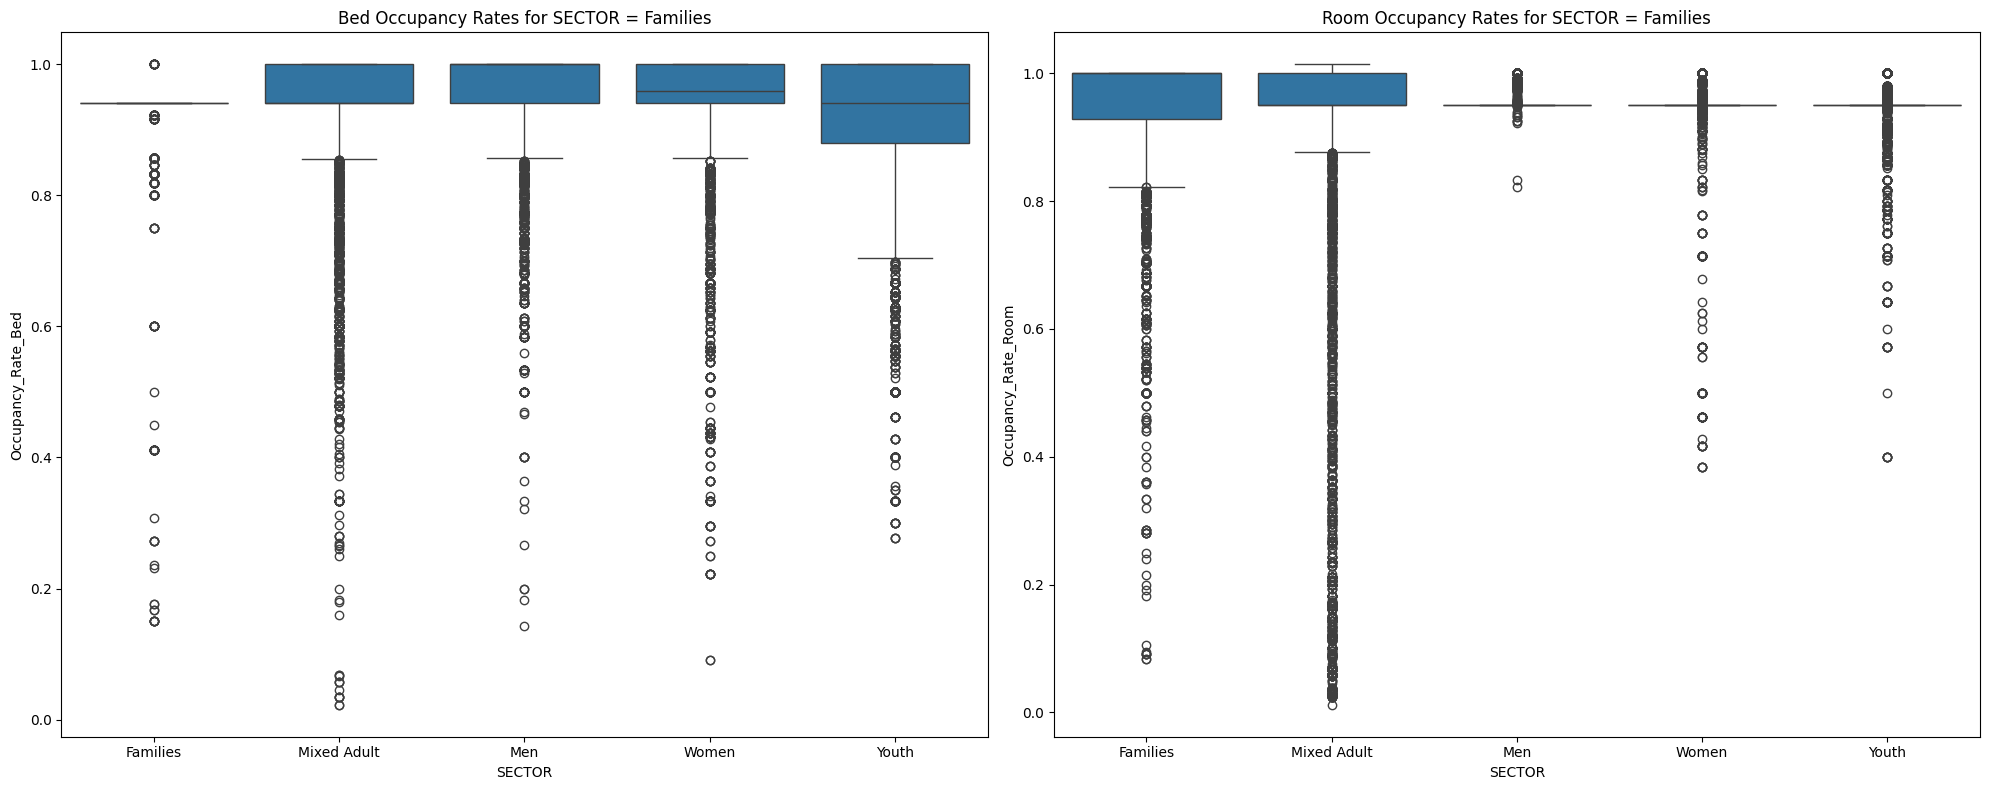


T-Test for SECTOR = Mixed Adult and OCCUPIED_BEDS:
T-Statistic (Bed): -5.040050731694998
P-Value (Bed): 4.6699875433559844e-07

T-Test for SECTOR = Mixed Adult and OCCUPIED_ROOMS:
T-Statistic (Room): -23.537051831950517
P-Value (Room): 7.641153905604157e-122


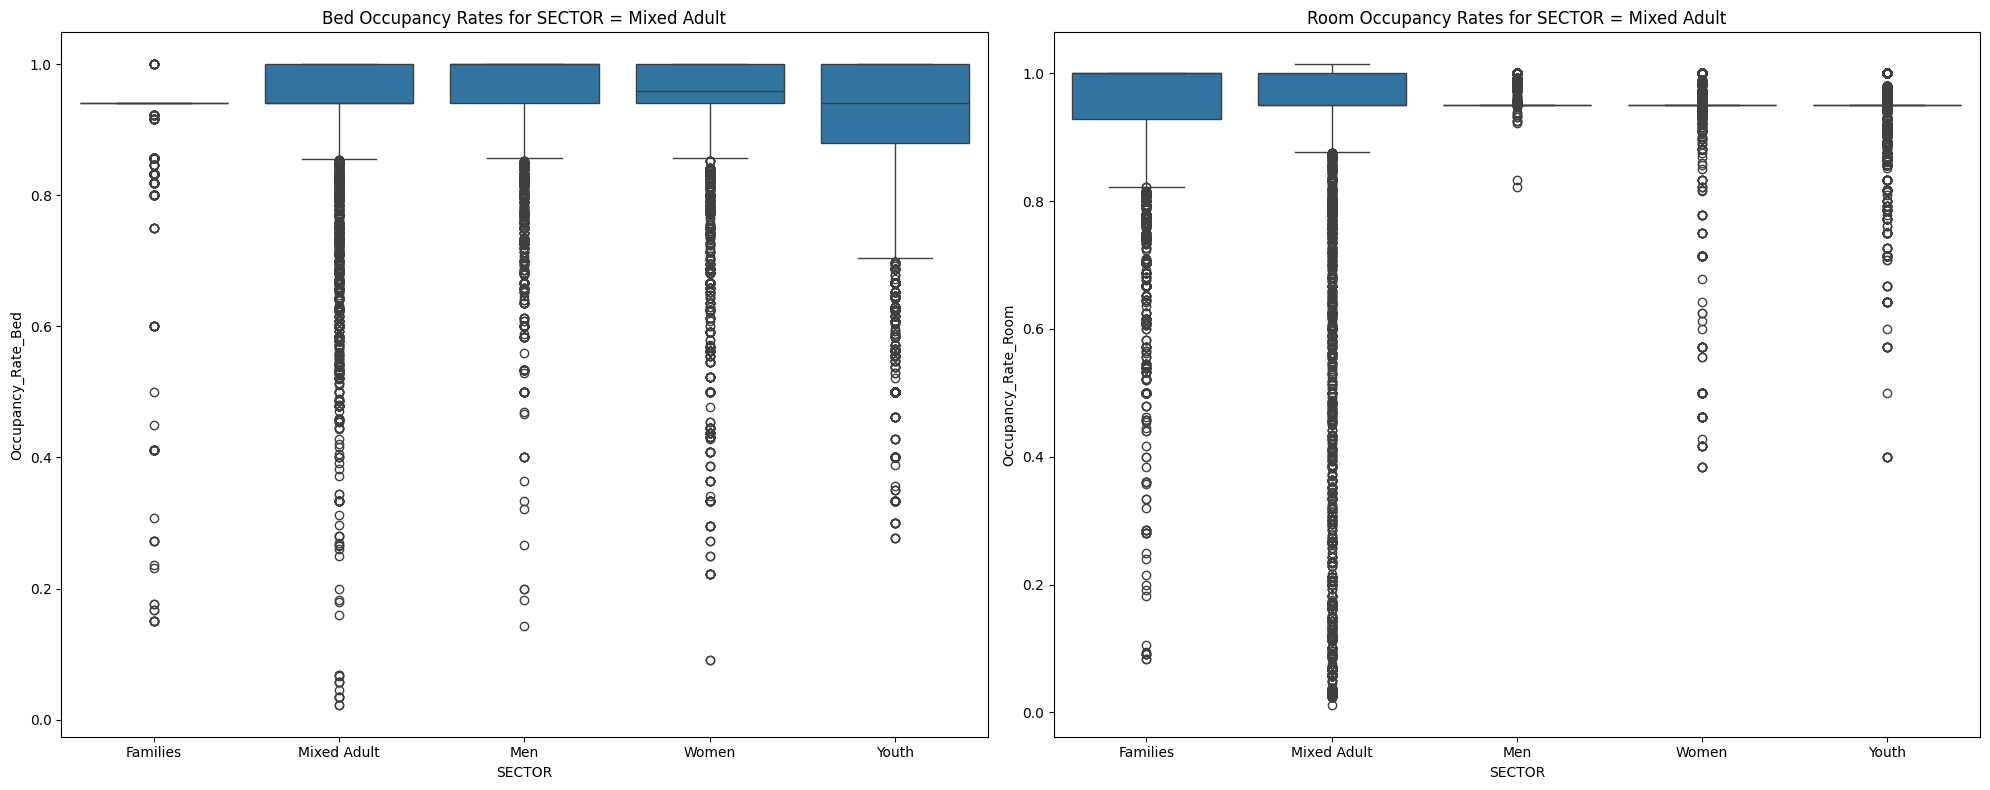


T-Test for SECTOR = Men and OCCUPIED_BEDS:
T-Statistic (Bed): 31.229716160313856
P-Value (Bed): 4.2676624895121574e-212

T-Test for SECTOR = Men and OCCUPIED_ROOMS:
T-Statistic (Room): 18.14691111269726
P-Value (Room): 2.31485991278654e-73


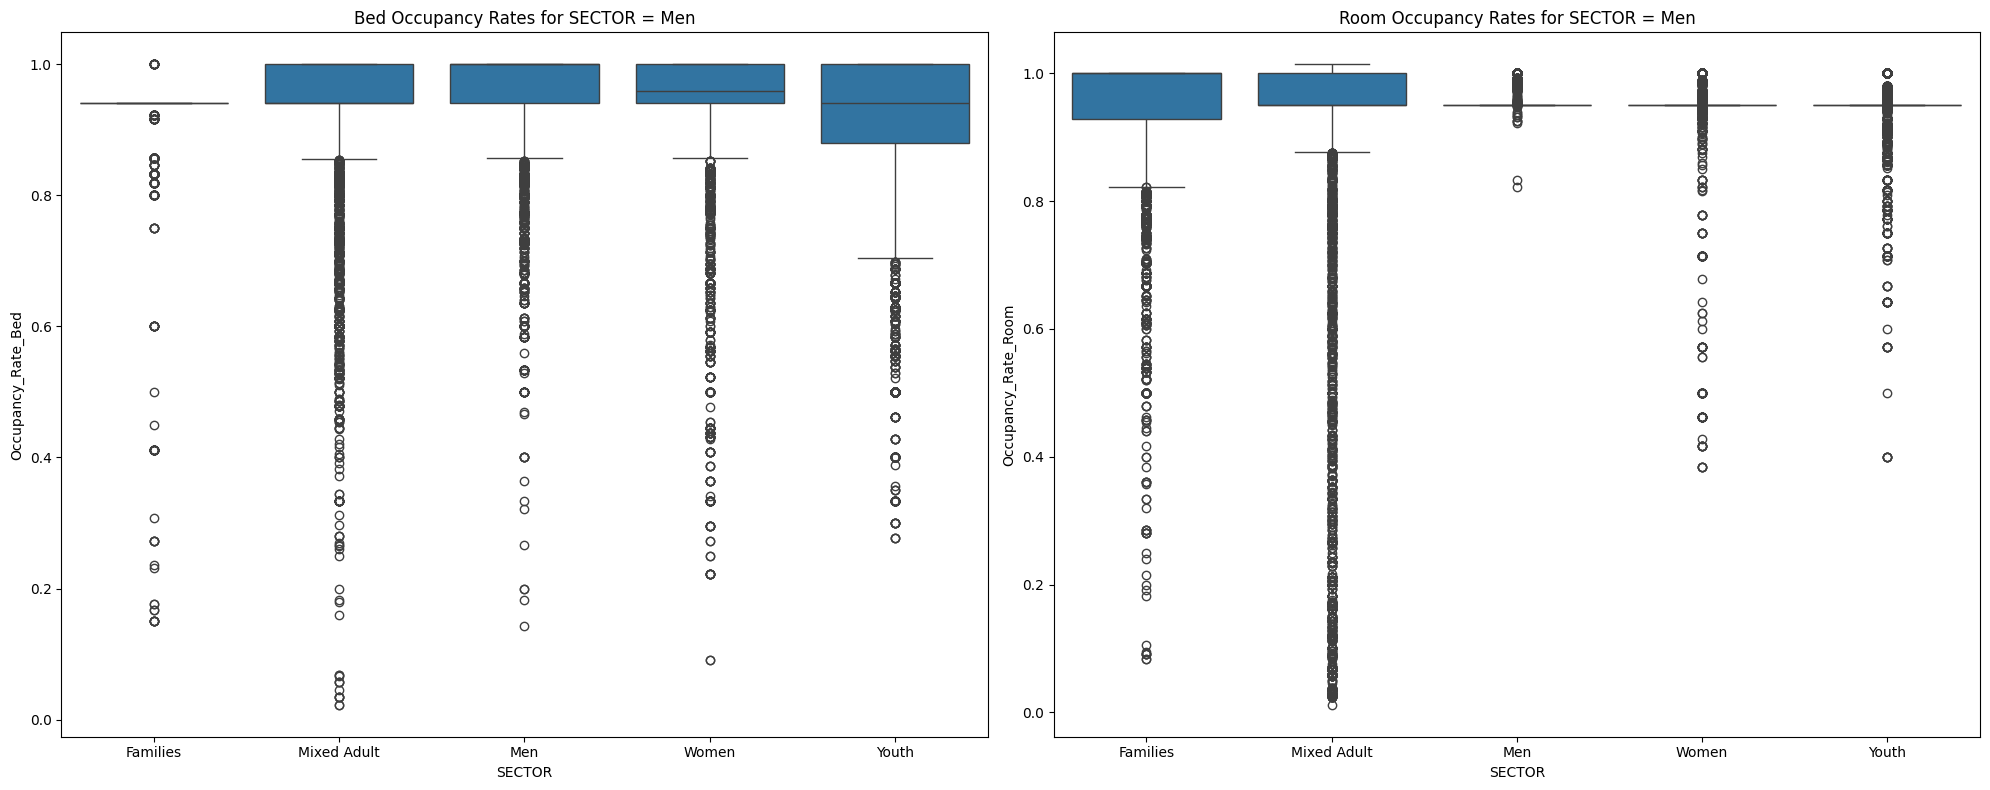


T-Test for SECTOR = Women and OCCUPIED_BEDS:
T-Statistic (Bed): 7.5372959718568175
P-Value (Bed): 4.877406968750958e-14

T-Test for SECTOR = Women and OCCUPIED_ROOMS:
T-Statistic (Room): 11.724233674035734
P-Value (Room): 1.0519189803705187e-31


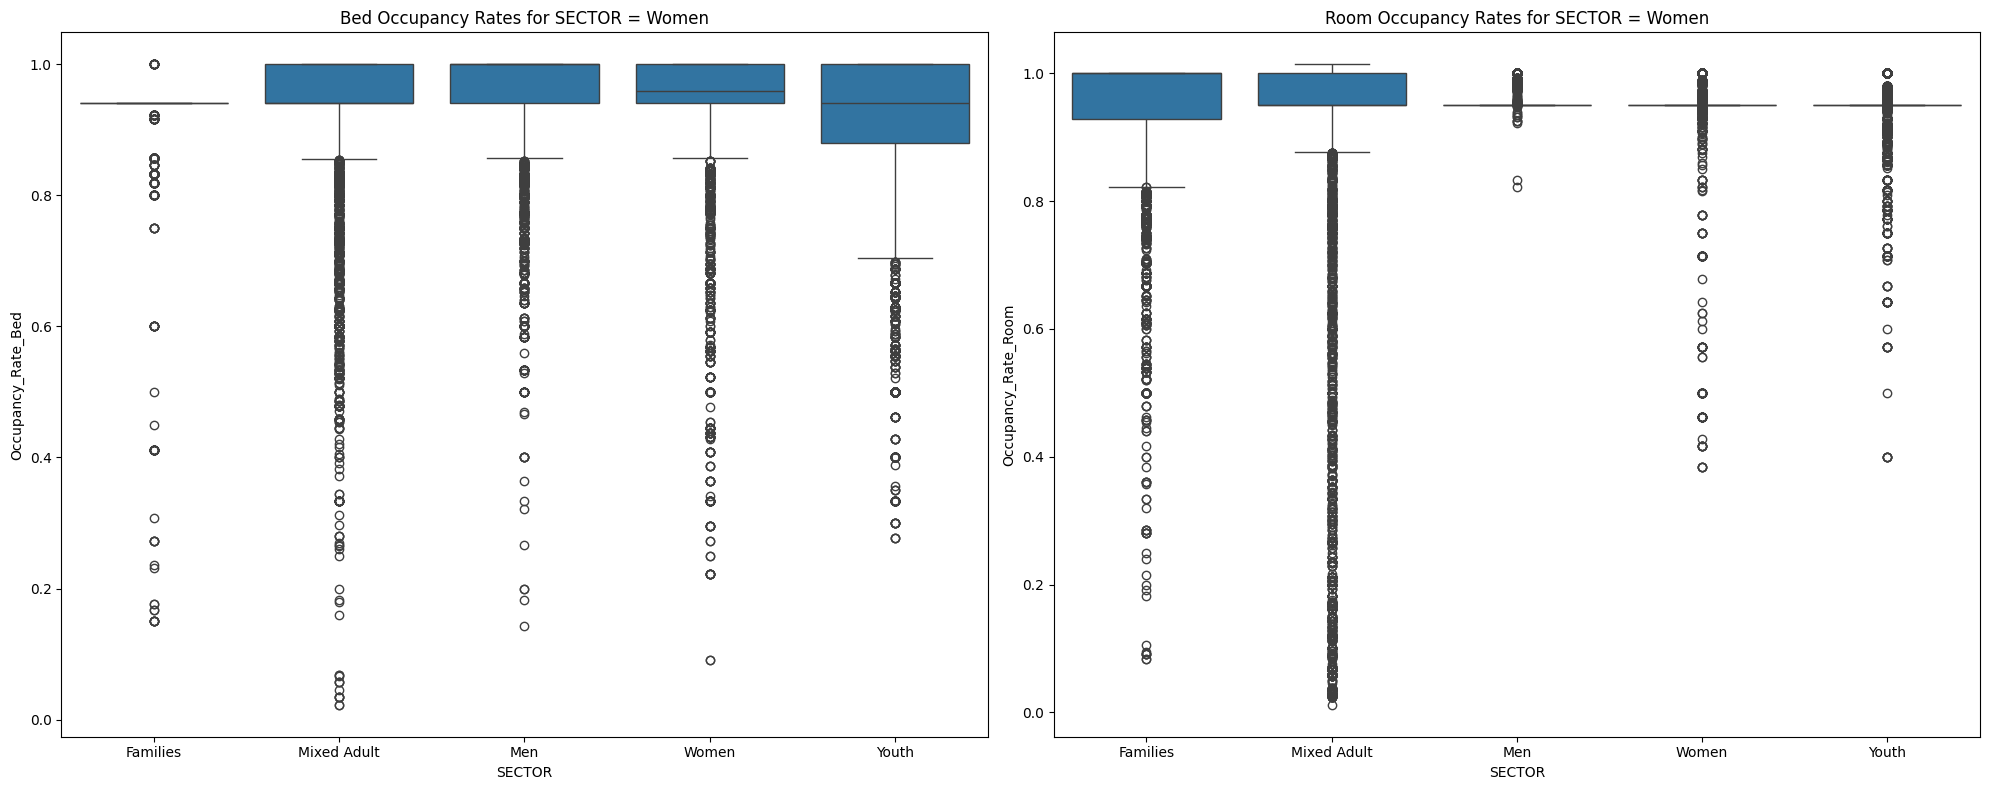


T-Test for SECTOR = Youth and OCCUPIED_BEDS:
T-Statistic (Bed): -37.1199436435463
P-Value (Bed): 1.281493313693352e-297

T-Test for SECTOR = Youth and OCCUPIED_ROOMS:
T-Statistic (Room): 4.6650320264807466
P-Value (Room): 3.0935174949588454e-06


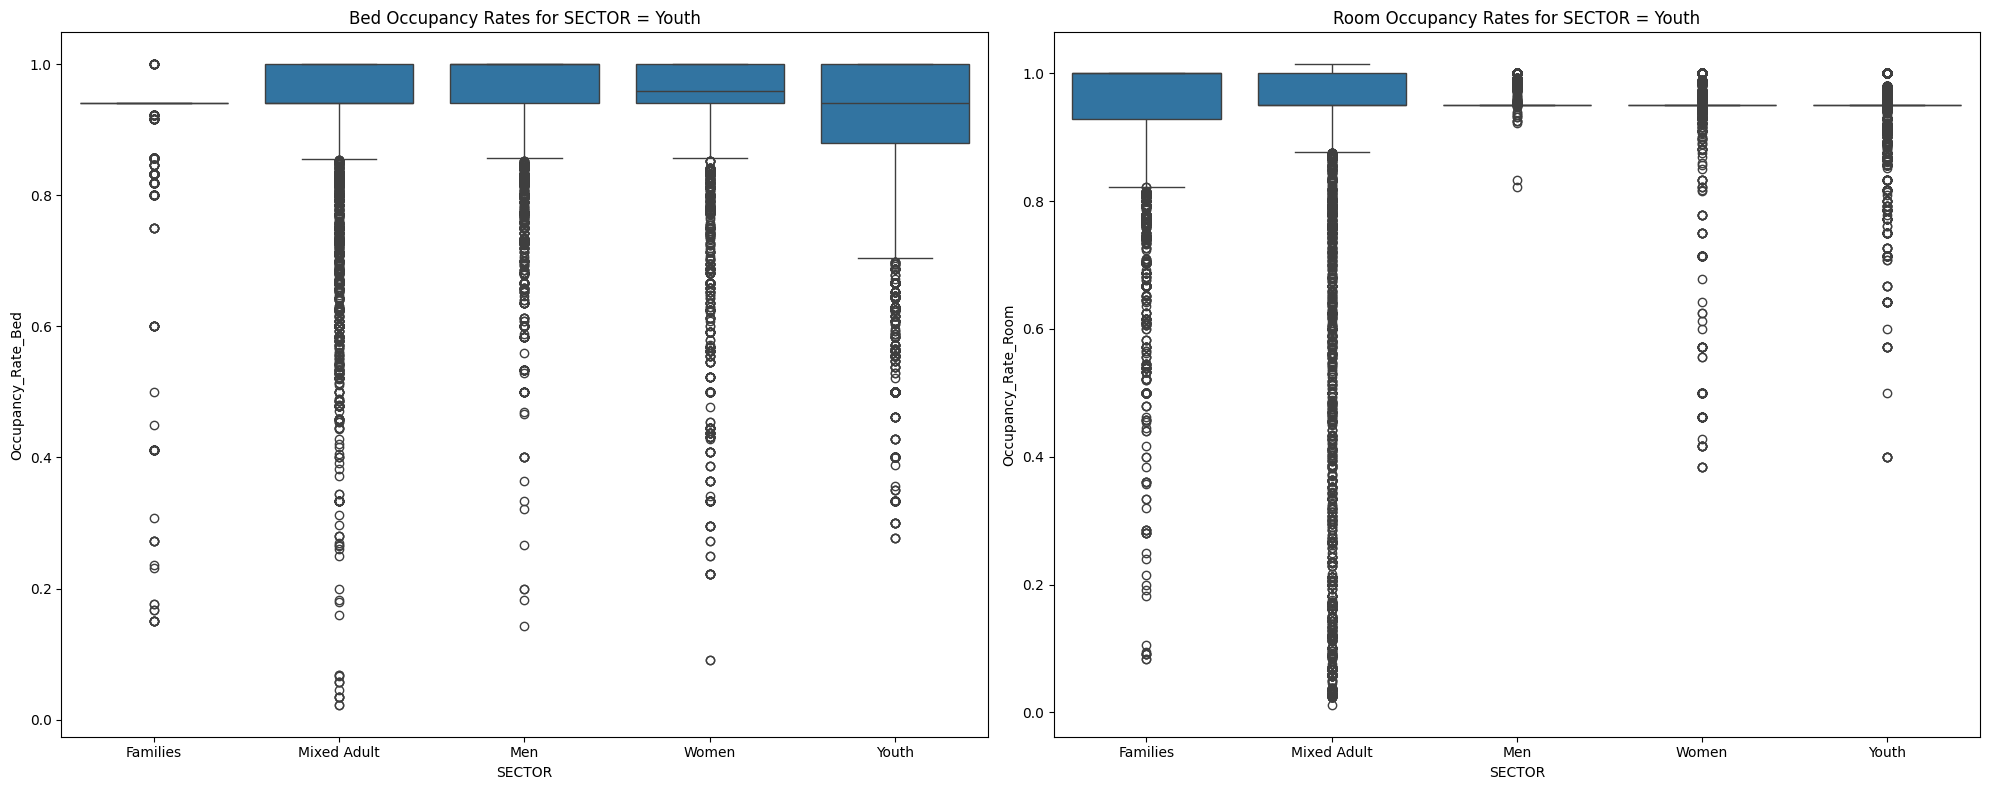

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# t-test 2 (sector)
# Read Dataset
df = pd.read_excel('./INF2178_A1_data.xlsx')

# Choose variables
categorical_variable = 'SECTOR'
continuous_variable_bed = 'OCCUPIED_BEDS'
continuous_variable_room = 'OCCUPIED_ROOMS'

# Calculate shelter program occupancy rates
df_cleaned['Occupancy_Rate_Bed'] = df_cleaned['OCCUPIED_BEDS']/df_cleaned['CAPACITY_ACTUAL_BED']
df_cleaned['Occupancy_Rate_Room'] = df_cleaned['OCCUPIED_ROOMS']/df_cleaned['CAPACITY_ACTUAL_ROOM']

# Identify unique categories
categories = df_cleaned[categorical_variable].unique()

# Perform t-tests and plot boxplots for each category
for category in categories:
    # Select data
    category_data_bed = df_cleaned[df_cleaned[categorical_variable] == category]['Occupancy_Rate_Bed']
    category_data_room = df_cleaned[df_cleaned[categorical_variable] == category]['Occupancy_Rate_Room']

    # Perform an independent t-test for bed occupancy rates
    t_statistic_bed, p_value_bed = ttest_ind(category_data_bed, df_cleaned[df_cleaned[categorical_variable] != category]['Occupancy_Rate_Bed'])

    # Perform an independent t-test for room occupancy rates
    t_statistic_room, p_value_room = ttest_ind(category_data_room, df_cleaned[df_cleaned[categorical_variable] != category]['Occupancy_Rate_Room'])

    # Print results
    print(f'\nT-Test for {categorical_variable} = {category} and {continuous_variable_bed}:')
    print(f'T-Statistic (Bed): {t_statistic_bed}')
    print(f'P-Value (Bed): {p_value_bed}')

    print(f'\nT-Test for {categorical_variable} = {category} and {continuous_variable_room}:')
    print(f'T-Statistic (Room): {t_statistic_room}')
    print(f'P-Value (Room): {p_value_room}')

    # Plot boxplots for bed and room occupancy rates
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=categorical_variable, y='Occupancy_Rate_Bed', data=df_cleaned)
    plt.title(f'Bed Occupancy Rates for {categorical_variable} = {category}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=categorical_variable, y='Occupancy_Rate_Room', data=df_cleaned)
    plt.title(f'Room Occupancy Rates for {categorical_variable} = {category}')

    plt.tight_layout()
    plt.show()



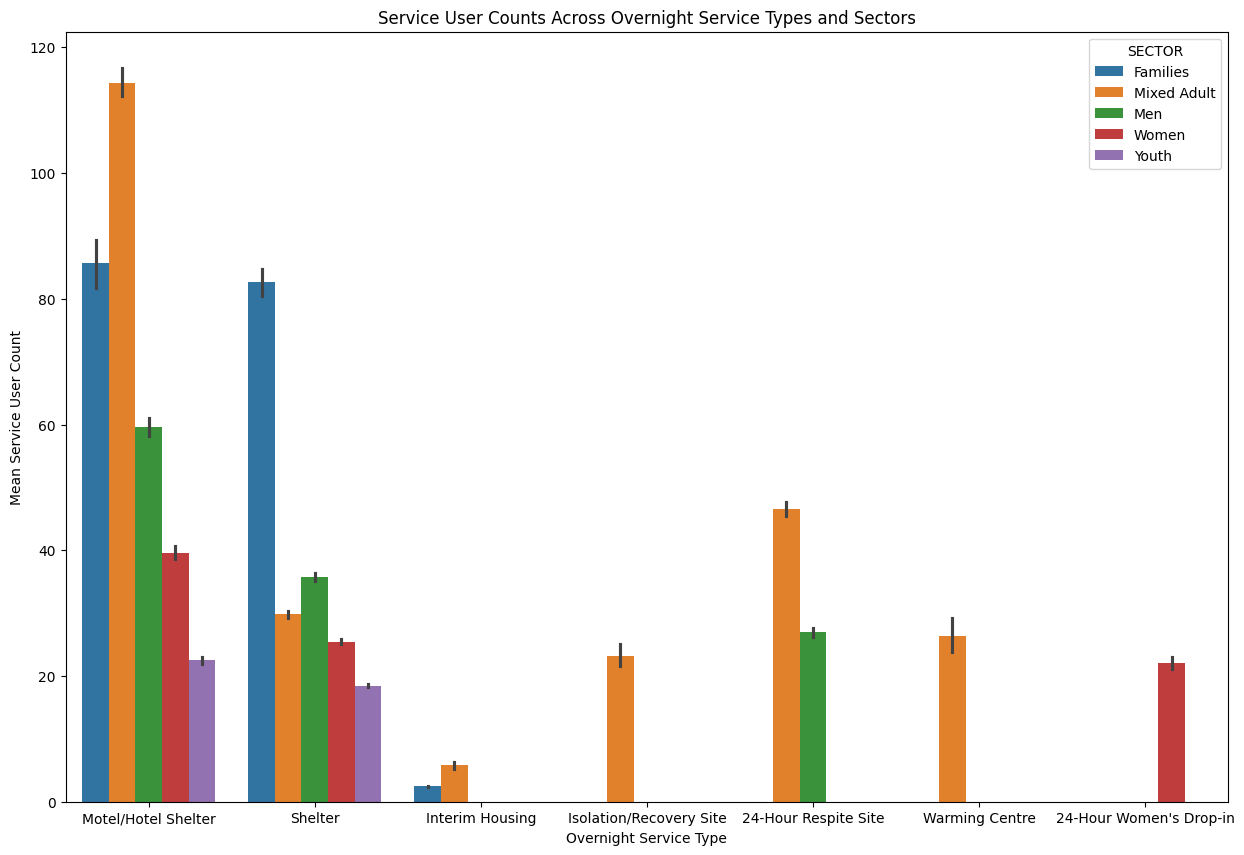

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exploratory Analysis 1

# Create a bar plot for each sector's service user counts on different service type
plt.figure(figsize=(15, 10))
sns.barplot(x='OVERNIGHT_SERVICE_TYPE', y='SERVICE_USER_COUNT', hue='SECTOR', data=df_cleaned)
plt.title('Service User Counts Across Overnight Service Types and Sectors')
plt.xlabel('Overnight Service Type')
plt.ylabel('Mean Service User Count')
plt.show()


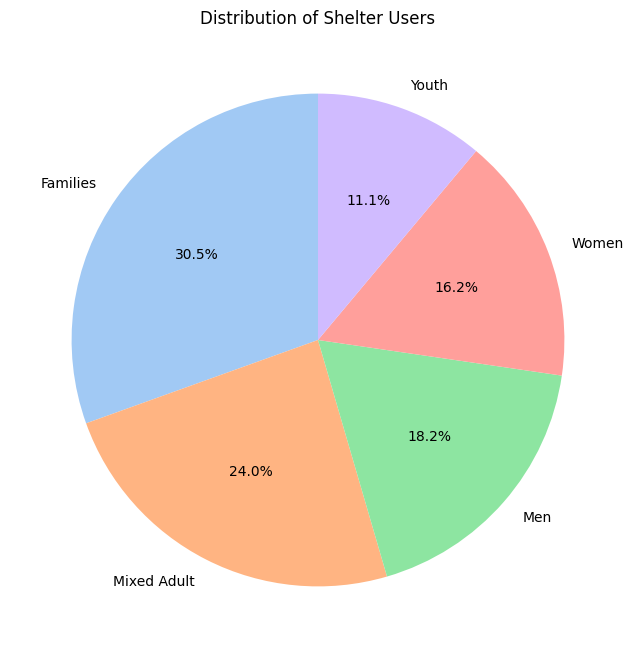

In [28]:
# Exploratory Analysis 2

# Create a pie chart to see each sector's distribution
plt.figure(figsize=(8, 8))
plt.pie(df_cleaned['SECTOR'].value_counts(), labels=df_cleaned['SECTOR'].unique(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Shelter Users')
plt.show()


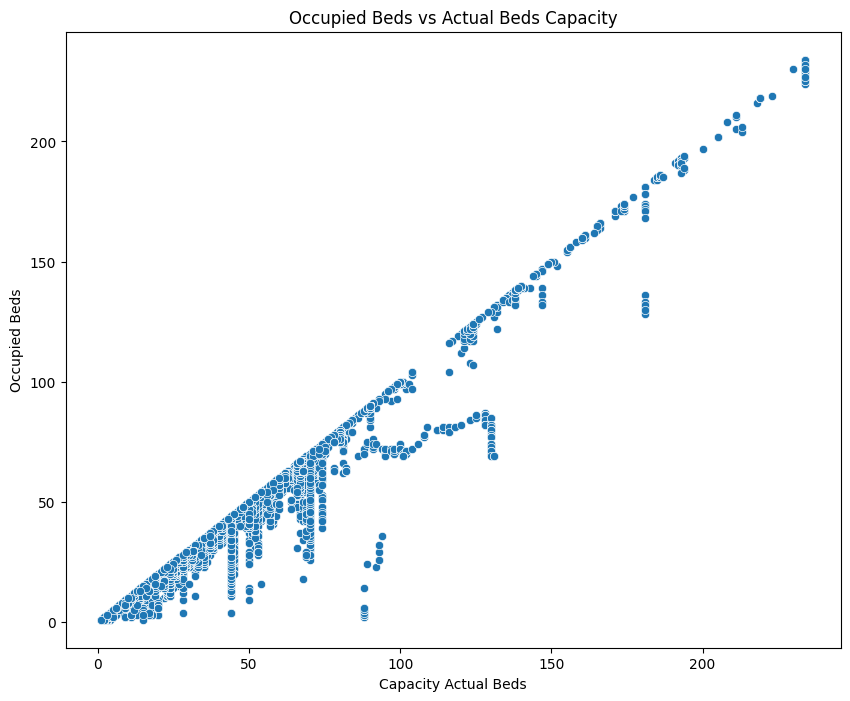

In [16]:
# Exploratory Analysis 3

# Create a scatter plot of Occupied Beds vs Actual Beds Capacity
plt.figure(figsize=(10, 8))
sns.scatterplot(x='CAPACITY_ACTUAL_BED', y='OCCUPIED_BEDS', data=df_cleaned)
plt.title('Occupied Beds vs Actual Beds Capacity')
plt.xlabel('Capacity Actual Beds')
plt.ylabel('Occupied Beds')
plt.show()


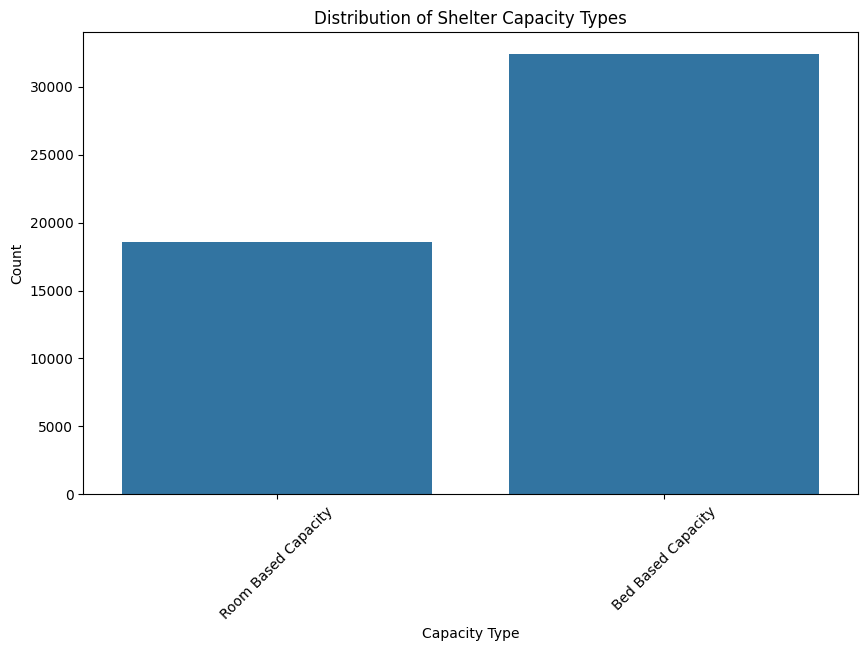

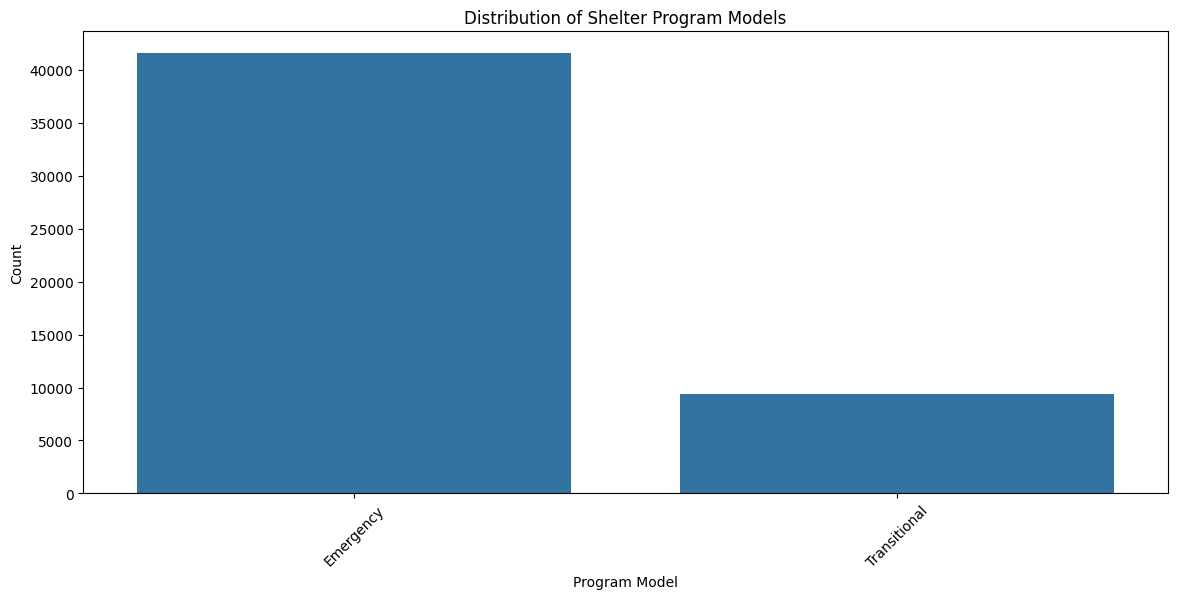

In [17]:
# Exploratory Analysis 4

# Create a countplot for Shelter Capacity Types
plt.figure(figsize=(10, 6))
sns.countplot(x='CAPACITY_TYPE', data=df_cleaned)
plt.title('Distribution of Shelter Capacity Types')
plt.xlabel('Capacity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Create a counatplot for Program Models
plt.figure(figsize=(14, 6))
sns.countplot(x='PROGRAM_MODEL', data=df_cleaned)
plt.title('Distribution of Shelter Program Models')
plt.xlabel('Program Model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


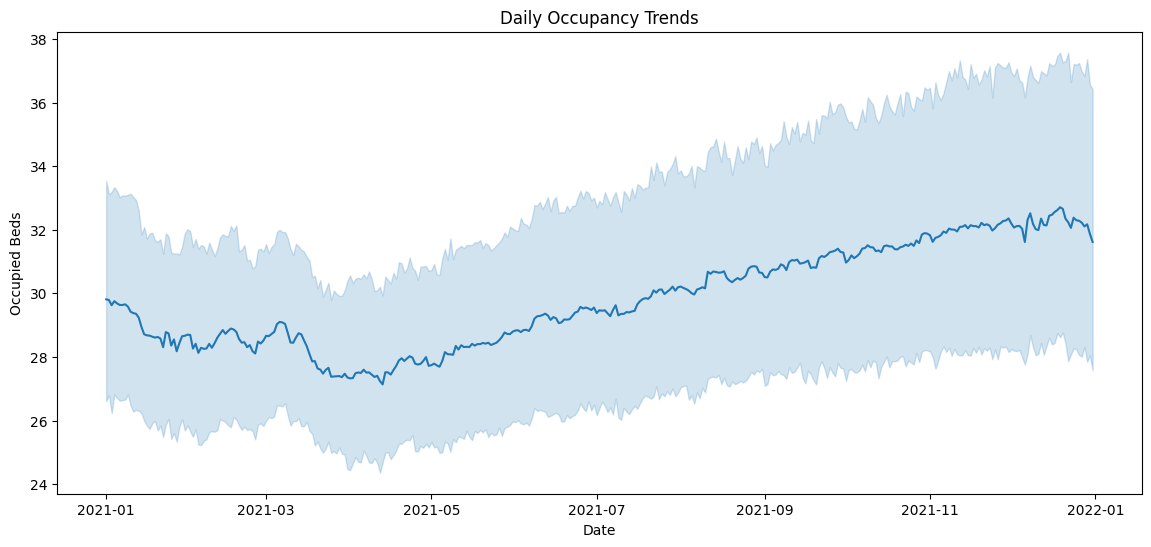

In [29]:
# Exploratory Analysis 5

# Create a line plot of Daily Occupancy over time
plt.figure(figsize=(14, 6))
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPIED_BEDS', data=df_cleaned)
plt.title('Daily Occupancy Trends')
plt.xlabel('Date')
plt.ylabel('Occupied Beds')
plt.show()
